In [1]:
import pandas as pd
import numpy as np
import pickle as pkl
import matplotlib.pyplot as plt

In [2]:
df=pd.read_csv('customer_churn.csv',delimiter=';')

In [3]:
df.tail()

,CustomerID,Age,Gender,Tenure,Usage Frequency,Support Calls,Payment Delay,Subscription Type,Contract Length,Total Spend,Last Interaction,Churn
440827,449995,42,Male,54.0,15,1.0,3,Premium,Annual,716.38,8,0
440828,449996,25,Female,8.0,13,1.0,20,Premium,Annual,745.38,2,0
440829,449997,26,Male,35.0,27,1.0,5,Standard,Quarterly,977.31,9,0
440830,449998,28,Male,55.0,14,2.0,0,Standard,Quarterly,602.55,2,0
440831,449999,31,Male,48.0,20,1.0,14,Premium,Quarterly,567.77,21,0


In [4]:
df.shape

(440832, 12)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 440832 entries, 0 to 440831
Data columns (total 12 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   CustomerID         440832 non-null  int64  
 1   Age                440832 non-null  int64  
 2   Gender             440821 non-null  object 
 3   Tenure             440820 non-null  float64
 4   Usage Frequency    440832 non-null  int64  
 5   Support Calls      440802 non-null  float64
 6   Payment Delay      440832 non-null  int64  
 7   Subscription Type  440832 non-null  object 
 8   Contract Length    440832 non-null  object 
 9   Total Spend        440823 non-null  float64
 10  Last Interaction   440832 non-null  int64  
 11  Churn              440832 non-null  int64  
dtypes: float64(3), int64(6), object(3)
memory usage: 40.4+ MB


In [6]:
df.columns

Index(['CustomerID', 'Age', 'Gender', 'Tenure', 'Usage Frequency',
       'Support Calls', 'Payment Delay', 'Subscription Type',
       'Contract Length', 'Total Spend', 'Last Interaction', 'Churn'],
      dtype='object')

In [7]:
df.Churn.value_counts()

Churn
1    249999
0    190833
Name: count, dtype: int64

**Split Data into Train and Test Data**

In [8]:
input_df=df.drop(['Churn','CustomerID'],axis=1)
output_df=df['Churn']

In [9]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(input_df, output_df, test_size = 0.2, random_state = 42)

In [10]:
x_train.head()

,Age,Gender,Tenure,Usage Frequency,Support Calls,Payment Delay,Subscription Type,Contract Length,Total Spend,Last Interaction
321744,24,Male,58.0,28,0.0,4,Basic,Annual,665.22,29
175119,24,Male,26.0,12,1.0,26,Basic,Quarterly,754.00,12
272447,18,Male,36.0,8,0.0,7,Premium,Quarterly,852.86,9
66769,36,Female,18.0,9,2.0,23,Premium,Monthly,758.00,3
70297,57,Female,27.0,26,8.0,15,Basic,Monthly,688.00,10


In [11]:
y_train.head()

321744    0
175119    1
272447    0
66769     1
70297     1
Name: Churn, dtype: int64

In [12]:
x_train.columns

Index(['Age', 'Gender', 'Tenure', 'Usage Frequency', 'Support Calls',
       'Payment Delay', 'Subscription Type', 'Contract Length', 'Total Spend',
       'Last Interaction'],
      dtype='object')

In [13]:
x_train.shape

(352665, 10)

**Handle Missing Value**

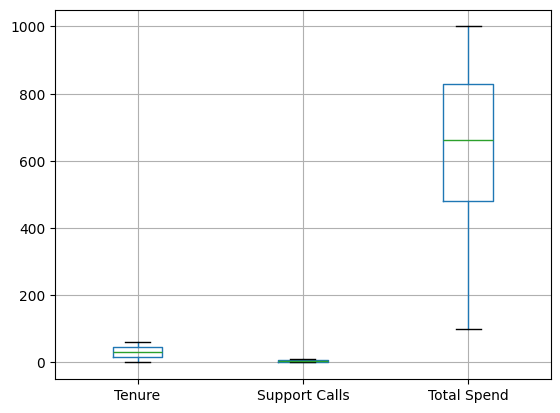

In [14]:
#Check Outliers
boxplot = x_train.boxplot(column=['Tenure','Support Calls','Total Spend'])
plt.show()

In [15]:
#Calculate Mean for Tenure,Support Calls,Total Spend
print('mean tenure:',np.mean(x_train['Tenure']))
print('mean Support Calls:',np.mean(x_train['Support Calls']))
print('mean Total Spend:',np.mean(x_train['Total Spend']))

mean tenure: 31.264970764545417
mean Support Calls: 3.6030886760831775
mean Total Spend: 631.5849042275968


In [16]:
#Impute missing value with mean for train and test
x_train['Tenure'].fillna(31.3, inplace=True)
x_train['Support Calls'].fillna(4, inplace=True)
x_train['Total Spend'].fillna(631.6, inplace=True)


x_test['Tenure'].fillna(31.3, inplace=True)
x_test['Support Calls'].fillna(4, inplace=True)
x_test['Total Spend'].fillna(631.6, inplace=True)


C:\Users\hartono\AppData\Local\Temp\ipykernel_20864\1586912508.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  x_train['Tenure'].fillna(31.3, inplace=True)
C:\Users\hartono\AppData\Local\Temp\ipykernel_20864\1586912508.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For exa

In [17]:
#calculate mode for Gender
import statistics as sts
print(sts.mode(x_train['Gender']))

Male


In [18]:
#Impute missing value with mode
x_train['Gender'].fillna('Male', inplace=True)
x_test['Gender'].fillna('Male', inplace=True)


C:\Users\hartono\AppData\Local\Temp\ipykernel_20864\2988360648.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  x_train['Gender'].fillna('Male', inplace=True)
C:\Users\hartono\AppData\Local\Temp\ipykernel_20864\2988360648.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For e

In [19]:
x_train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 352665 entries, 321744 to 121958
Data columns (total 10 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   Age                352665 non-null  int64  
 1   Gender             352665 non-null  object 
 2   Tenure             352665 non-null  float64
 3   Usage Frequency    352665 non-null  int64  
 4   Support Calls      352665 non-null  float64
 5   Payment Delay      352665 non-null  int64  
 6   Subscription Type  352665 non-null  object 
 7   Contract Length    352665 non-null  object 
 8   Total Spend        352665 non-null  float64
 9   Last Interaction   352665 non-null  int64  
dtypes: float64(3), int64(4), object(3)
memory usage: 29.6+ MB


**Categorical Feature Encoding**

In [20]:
#Check value of features
df.Gender.value_counts()

Gender
Male      250245
Female    190576
Name: count, dtype: int64

In [21]:
df['Subscription Type'].value_counts()

Subscription Type
Standard    149128
Premium     148678
Basic       143026
Name: count, dtype: int64

In [22]:
df['Contract Length'].value_counts()

Contract Length
Annual       177198
Quarterly    176530
Monthly       87104
Name: count, dtype: int64

In [23]:
#Binary Encoding Categorical to integer
xtrain_encode={"Gender": {"Male":1,"Female" :0}}
x_train=x_train.replace(xtrain_encode)
x_test=x_test.replace(xtrain_encode)

C:\Users\hartono\AppData\Local\Temp\ipykernel_20864\886341873.py:3: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  x_train=x_train.replace(xtrain_encode)
C:\Users\hartono\AppData\Local\Temp\ipykernel_20864\886341873.py:4: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  x_test=x_test.replace(xtrain_encode)


In [24]:
x_train.head()

,Age,Gender,Tenure,Usage Frequency,Support Calls,Payment Delay,Subscription Type,Contract Length,Total Spend,Last Interaction
321744,24,1,58.0,28,0.0,4,Basic,Annual,665.22,29
175119,24,1,26.0,12,1.0,26,Basic,Quarterly,754.00,12
272447,18,1,36.0,8,0.0,7,Premium,Quarterly,852.86,9
66769,36,0,18.0,9,2.0,23,Premium,Monthly,758.00,3
70297,57,0,27.0,26,8.0,15,Basic,Monthly,688.00,10


In [25]:
xtrain_encode

{'Gender': {'Male': 1, 'Female': 0}}

In [26]:
filename = 'gender_encode.pkl'
pkl.dump(xtrain_encode, open(filename, 'wb'))

In [27]:
#One hot Encoding
from sklearn.preprocessing import OneHotEncoder

subs_enc_train=x_train[['Subscription Type']]
cont_enc_train=x_train[['Contract Length']]

subs_enc_test=x_test[['Subscription Type']]
cont_enc_test=x_test[['Contract Length']]

train_encoded_subs=OneHotEncoder()
train_encoded_cont=OneHotEncoder()

subs_enc_train=pd.DataFrame(train_encoded_subs.fit_transform(subs_enc_train).toarray(),columns=train_encoded_subs.get_feature_names_out())
cont_enc_train=pd.DataFrame(train_encoded_cont.fit_transform(cont_enc_train).toarray(),columns=train_encoded_cont.get_feature_names_out())

subs_enc_test=pd.DataFrame(train_encoded_subs.transform(subs_enc_test).toarray(),columns=train_encoded_subs.get_feature_names_out())
cont_enc_test=pd.DataFrame(train_encoded_cont.transform(cont_enc_test).toarray(),columns=train_encoded_cont.get_feature_names_out())


x_train=x_train.reset_index()
x_test=x_test.reset_index()

x_train_enc=pd.concat([x_train,subs_enc_train,cont_enc_train], axis=1)
x_test_enc=pd.concat([x_test,subs_enc_test,cont_enc_test], axis=1)

In [28]:
train_encoded_cont.get_feature_names_out()

array(['Contract Length_Annual', 'Contract Length_Monthly',
       'Contract Length_Quarterly'], dtype=object)

In [29]:
train_encoded_subs.get_feature_names_out()

array(['Subscription Type_Basic', 'Subscription Type_Premium',
       'Subscription Type_Standard'], dtype=object)

In [30]:
filename_subs = 'oneHot_encode_subs.pkl'
pkl.dump(train_encoded_subs, open(filename_subs, 'wb'))

filename_subs = 'oneHot_encode_cont.pkl'
pkl.dump(train_encoded_cont, open(filename_subs, 'wb'))

In [31]:
x_train_enc.head()

,index,Age,Gender,Tenure,Usage Frequency,Support Calls,Payment Delay,Subscription Type,Contract Length,Total Spend,Last Interaction,Subscription Type_Basic,Subscription Type_Premium,Subscription Type_Standard,Contract Length_Annual,Contract Length_Monthly,Contract Length_Quarterly
0,321744,24,1,58.0,28,0.0,4,Basic,Annual,665.22,29,1.0,0.0,0.0,1.0,0.0,0.0
1,175119,24,1,26.0,12,1.0,26,Basic,Quarterly,754.00,12,1.0,0.0,0.0,0.0,0.0,1.0
2,272447,18,1,36.0,8,0.0,7,Premium,Quarterly,852.86,9,0.0,1.0,0.0,0.0,0.0,1.0
3,66769,36,0,18.0,9,2.0,23,Premium,Monthly,758.00,3,0.0,1.0,0.0,0.0,1.0,0.0
4,70297,57,0,27.0,26,8.0,15,Basic,Monthly,688.00,10,1.0,0.0,0.0,0.0,1.0,0.0


In [32]:
x_test_enc.head()

,index,Age,Gender,Tenure,Usage Frequency,Support Calls,Payment Delay,Subscription Type,Contract Length,Total Spend,Last Interaction,Subscription Type_Basic,Subscription Type_Premium,Subscription Type_Standard,Contract Length_Annual,Contract Length_Monthly,Contract Length_Quarterly
0,159565,23,0,10.0,16,8.0,16,Premium,Quarterly,589.00,13,0.0,1.0,0.0,0.0,0.0,1.0
1,127464,33,1,3.0,20,0.0,22,Basic,Quarterly,158.00,12,1.0,0.0,0.0,0.0,0.0,1.0
2,22398,27,0,57.0,3,0.0,24,Standard,Annual,915.00,26,0.0,0.0,1.0,1.0,0.0,0.0
3,99337,35,0,28.0,23,5.0,13,Basic,Annual,334.00,29,1.0,0.0,0.0,1.0,0.0,0.0
4,300996,28,1,53.0,30,2.0,5,Basic,Annual,568.86,15,1.0,0.0,0.0,1.0,0.0,0.0


In [33]:
x_train_enc.columns

Index(['index', 'Age', 'Gender', 'Tenure', 'Usage Frequency', 'Support Calls',
       'Payment Delay', 'Subscription Type', 'Contract Length', 'Total Spend',
       'Last Interaction', 'Subscription Type_Basic',
       'Subscription Type_Premium', 'Subscription Type_Standard',
       'Contract Length_Annual', 'Contract Length_Monthly',
       'Contract Length_Quarterly'],
      dtype='object')

**Define the features for modelling**

In [34]:
x_train_enc=x_train_enc.drop(['index','Subscription Type', 'Contract Length'],axis=1)

In [35]:
x_train_enc.head()

,Age,Gender,Tenure,Usage Frequency,Support Calls,Payment Delay,Total Spend,Last Interaction,Subscription Type_Basic,Subscription Type_Premium,Subscription Type_Standard,Contract Length_Annual,Contract Length_Monthly,Contract Length_Quarterly
0,24,1,58.0,28,0.0,4,665.22,29,1.0,0.0,0.0,1.0,0.0,0.0
1,24,1,26.0,12,1.0,26,754.00,12,1.0,0.0,0.0,0.0,0.0,1.0
2,18,1,36.0,8,0.0,7,852.86,9,0.0,1.0,0.0,0.0,0.0,1.0
3,36,0,18.0,9,2.0,23,758.00,3,0.0,1.0,0.0,0.0,1.0,0.0
4,57,0,27.0,26,8.0,15,688.00,10,1.0,0.0,0.0,0.0,1.0,0.0


In [36]:
x_train_enc.columns

Index(['Age', 'Gender', 'Tenure', 'Usage Frequency', 'Support Calls',
       'Payment Delay', 'Total Spend', 'Last Interaction',
       'Subscription Type_Basic', 'Subscription Type_Premium',
       'Subscription Type_Standard', 'Contract Length_Annual',
       'Contract Length_Monthly', 'Contract Length_Quarterly'],
      dtype='object')

In [37]:
from sklearn.ensemble import RandomForestClassifier
import warnings
warnings.filterwarnings('ignore')

RF_class = RandomForestClassifier(criterion= 'gini',max_depth=4)
RF_class.fit(x_train_enc, y_train)


RandomForestClassifier(max_depth=4)

In [38]:
x_test_enc=x_test_enc.drop(['index','Subscription Type', 'Contract Length'],axis=1)

In [39]:
y_predict=RF_class.predict(x_test_enc)

In [40]:
from sklearn.metrics import classification_report
print('\nClassification Report\n')
print(classification_report(y_test, y_predict, target_names=['1','0']))


Classification Report

              precision    recall  f1-score   support

           1       0.95      0.99      0.97     38063
           0       1.00      0.96      0.98     50104

    accuracy                           0.98     88167
   macro avg       0.97      0.98      0.97     88167
weighted avg       0.98      0.98      0.98     88167



In [41]:
filename = 'RF_churn.pkl'
pkl.dump(RF_class, open(filename, 'wb'))

**Checking some features value for deployment**

In [42]:
df['Tenure'].describe()

count    440820.000000
mean         31.256207
std          17.255696
min           1.000000
25%          16.000000
50%          32.000000
75%          46.000000
max          60.000000
Name: Tenure, dtype: float64

In [43]:
df['Usage Frequency'].describe()

count    440832.000000
mean         15.807494
std           8.586242
min           1.000000
25%           9.000000
50%          16.000000
75%          23.000000
max          30.000000
Name: Usage Frequency, dtype: float64

In [44]:
df['Payment Delay'].describe()

count    440832.000000
mean         12.965722
std           8.258063
min           0.000000
25%           6.000000
50%          12.000000
75%          19.000000
max          30.000000
Name: Payment Delay, dtype: float64

In [45]:
df['Last Interaction'].describe()

count    440832.000000
mean         14.480868
std           8.596208
min           1.000000
25%           7.000000
50%          14.000000
75%          22.000000
max          30.000000
Name: Last Interaction, dtype: float64